# Credit Risk Scoring

## Data cleaning and preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./CreditScoring.csv")

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df['status'].value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [6]:
df['status'] = df['status'].map({1:'ok',2:'default',0:'unknown'})

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)
 
marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)
 
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)
 
job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)
 

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


### Above we see max values are very huge and we need to clean it

In [10]:
for col in ['income','assets','debt']:
    df[col] = df[col].replace(to_replace=99999999,value=np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df = df[df['status']!='unknown'].reset_index(drop=True)

## Spliting the dataframe to train, validation and testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=11)

df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=11)

In [15]:

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [16]:
y_train = (df_train['status']=='default').astype(int).values
y_val = (df_val['status']=='default').astype(int).values
y_test = (df_test['status']=='default').astype(int).values


In [17]:
del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision tree

In [19]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'         

In [20]:
xi = df_train.iloc[0].to_dict()
xi         

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [21]:
assess_risk(xi)

'ok'

### Above we have implemented rules manually, this can be learned by the model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [23]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [24]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [25]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
val_dicts = df_val.fillna(0).to_dict(orient='records')

In [27]:
X_val = dv.transform(val_dicts)

In [28]:
y_pred = dt.predict_proba(X_val)[:,1]

In [29]:
roc_auc_score(y_val,y_pred)

0.6561236104720156

In [30]:
# lets see roc-auc for training dataset

y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

### We see that the ROC AUC for training dataset is 1.0 and for the validation dataset is 0.67, this is overfitting.

#### Overfitting: Model learns too well that it memorizes the data, when it sees new example its clueless and unable to predict.

#### We can restrict the depth of the tree, to address this problem

In [31]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
#
y_pred = dt.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train,y_pred)
print(f"AUC for training dataset is {auc_train}")

y_pred = dt.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val,y_pred)
print(f"AUC for validation dataset is {auc_val}")

AUC for training dataset is 0.7054989859726213
AUC for validation dataset is 0.6685264343319367


In [33]:
# what are the rules of tree
from sklearn.tree import export_text

In [34]:
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



## Tuning Decision Tree Algorithm

- Selecting `max depth`
- Selecting `min_samples_leaf`

In [35]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(f"{d}->{auc:.3f}")

1->0.606
2->0.669
3->0.739
4->0.761
5->0.767
6->0.757
10->0.695
15->0.662
20->0.649
None->0.659


#### Best depths are 4,5,6

In [36]:
scores = []
for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,s,auc))

In [37]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [38]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
40,10.0,15,0.790596
67,NaN,15,0.788537
58,20.0,15,0.787448
49,15.0,15,0.786706
22,6.0,15,0.785250
...,...,...,...
53,15.0,500,0.679842
55,20.0,2,0.675580
45,15.0,1,0.670040
63,NaN,1,0.665629


In [39]:
df_scores_pivot = df_scores.pivot_table(index='min_samples_leaf',
                      columns='max_depth',
                      values = 'auc')

df_scores_pivot.round(3)

max_depth,4.0,5.0,6.0,7.0,10.0,15.0,20.0
min_samples_leaf,,,,,,,
1,0.761,0.767,0.757,0.736,0.684,0.670,0.660
2,0.761,0.766,0.753,0.747,0.711,0.683,0.676
5,0.761,0.768,0.760,0.757,0.726,0.718,0.717
10,0.761,0.762,0.778,0.765,0.770,0.763,0.762
15,0.764,0.772,0.785,0.779,0.791,0.787,0.787
20,0.761,0.774,0.774,0.779,0.784,0.782,0.784
100,0.756,0.763,0.776,0.780,0.780,0.780,0.780
200,0.747,0.759,0.768,0.768,0.768,0.768,0.768
500,0.680,0.680,0.680,0.680,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

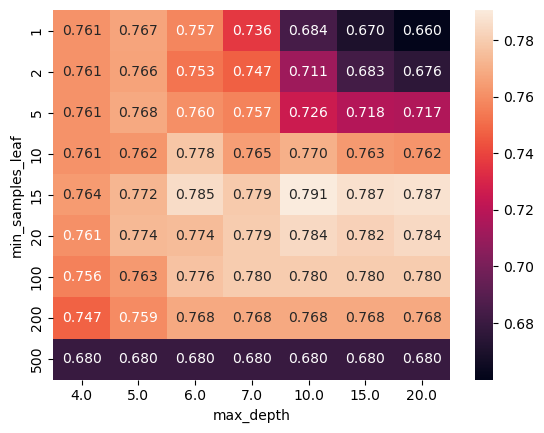

In [40]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

In [41]:
max_depth = 10
min_samples_leaf = 15


In [42]:
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=15)

In [43]:
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Ensembles and random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val,y_pred)

0.7744726453706618

In [47]:
rf_roc_auc_scores=[]
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    rf_auc = roc_auc_score(y_val,y_pred)
    rf_roc_auc_scores.append((n,rf_auc))

df_rf_n_auc = pd.DataFrame(rf_roc_auc_scores,columns=['n_estimators','auc'])

In [48]:
df_rf_n_auc

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


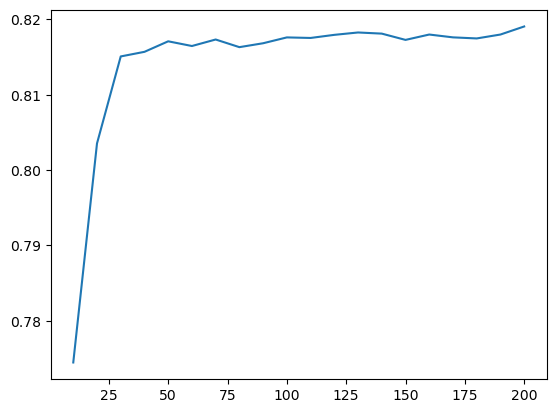

In [49]:
plt.plot(df_rf_n_auc['n_estimators'],df_rf_n_auc['auc'])

In [50]:
rf_d_auc_scores=[]

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        rf_auc = roc_auc_score(y_val,y_pred)
        rf_d_auc_scores.append((d,n,rf_auc))

df_d_rf_n_auc = pd.DataFrame(rf_d_auc_scores,columns=['max_depth','n_estimators','auc'])

In [51]:
df_d_rf_n_auc

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


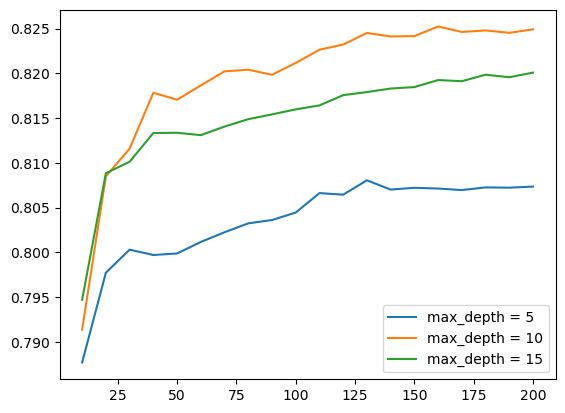

In [52]:
for d in [5,10,15]:
    df_subset = df_d_rf_n_auc[df_d_rf_n_auc['max_depth']==d]
    plt.plot(df_subset['n_estimators'],df_subset['auc'],label=f"max_depth = {d}")
    plt.legend()

In [53]:
max_depth =10

In [54]:
rf_leaf_auc_scores=[]

for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        rf_auc = roc_auc_score(y_val,y_pred)
        rf_leaf_auc_scores.append((s,n,rf_auc))

df_leaf_rf_n_auc = pd.DataFrame(rf_leaf_auc_scores,
                                columns=['min_samples_leaf','n_estimators','auc'])

In [55]:
df_leaf_rf_n_auc

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058
...,...,...,...
95,50,160,0.805929
96,50,170,0.805172
97,50,180,0.805324
98,50,190,0.805596


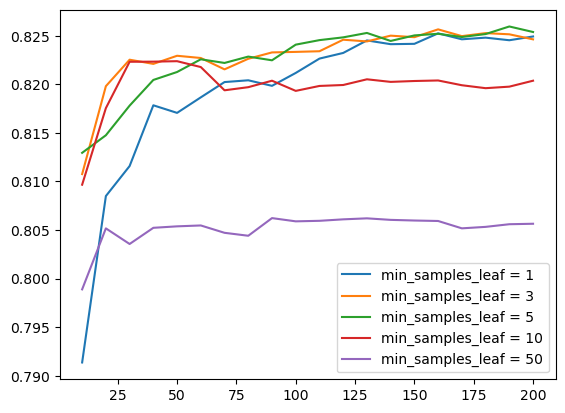

In [56]:
for s in [1,3,5,10,50]:
    df_subset = df_leaf_rf_n_auc[df_leaf_rf_n_auc['min_samples_leaf']==s]
    plt.plot(df_subset['n_estimators'],df_subset['auc'],label=f"min_samples_leaf = {s}")
    plt.legend()

In [57]:
#our best value for mean_samples_leaf
min_samples_leaf = 3

In [58]:
rf = RandomForestClassifier(max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
